In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cm as CM 
import seaborn as sns
import time
import requests
from matplotlib.patches import Circle, Rectangle, Arc

%matplotlib notebook
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36'}

In [3]:
class MidpointNormalize(clrs.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        clrs.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

def shot_data(season='2018-19', game_id='', player_id=0, team_abb=''):
    team_dict = {'ATL': 1610612737, 'BOS': 1610612738,
                 'BKN': 1610612751, 'CHA': 1610612766, 
                 'CHI': 1610612741, 'CLE': 1610612739, 
                 'DAL': 1610612742, 'DEN': 1610612743, 
                 'DET': 1610612765, 'GSW': 1610612744, 
                 'HOU': 1610612745, 'IND': 1610612754,
                 'LAC': 1610612746, 'LAL': 1610612747, 
                 'MEM': 1610612763, 'MIA': 1610612748,
                 'MIL': 1610612749, 'MIN': 1610612750, 
                 'NOP': 1610612740, 'NYK': 1610612752,
                 'OKC': 1610612760, 'ORL': 1610612753, 
                 'PHI': 1610612755, 'PHX': 1610612756,
                 'POR': 1610612757, 'SAC': 1610612758,
                 'SAS': 1610612759, 'TOR': 1610612761,
                 'UTA': 1610612762, 'WAS': 1610612764,
                 '': 0
                 }
    full_url = 'https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=33&CFPARAMS=' + season + \
                '&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=' + game_id + \
                '&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=' + str(player_id) + \
                '&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=' + season + \
                '&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=' + str(team_dict[team_abb]) + \
                '&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='
    json = requests.get(full_url, headers=headers).json()
    return(json)

def draw_court(ax=None, color='gray', lw=1, outer_lines=False):
    if ax is None:
        ax = plt.gca()
    
    # Hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    
    # Backboard
    backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)
    
    # Paint
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    
    # Free throw arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, fill=False)
    
    # Restricted zone
    restricted = Arc((0,0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    
    # Three point line
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)
    
    # Center court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)
    
    # List of elements
    court_elements = [hoop, outer_box, inner_box, top_free_throw, bottom_free_throw,
                     restricted, corner_three_a, corner_three_b, three_arc,
                     center_outer_arc, center_inner_arc]
    
    if outer_lines:
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)
        
    for element in court_elements:
        ax.add_patch(element)
        
    return ax

In [17]:
json = shot_data(team_abb='TOR')
data = json['resultSets'][0]['rowSet']
columns = json['resultSets'][0]['headers']
raps = pd.DataFrame.from_records(data, columns=columns)

In [18]:
raps.drop(columns=['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_NAME'])

,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,1,11,24,Missed Shot,Step Back Jump shot,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,21,13,214,1,0,20181017,TOR,CLE
1,1,11,2,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-9,7,1,1,20181017,TOR,CLE
2,1,10,30,Missed Shot,Running Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-168,204,1,0,20181017,TOR,CLE
3,1,9,47,Missed Shot,Fadeaway Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,12,118,44,1,0,20181017,TOR,CLE
4,1,9,41,Missed Shot,Tip Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,-6,1,0,20181017,TOR,CLE
5,1,9,10,Made Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,22,-229,11,1,1,20181017,TOR,CLE
6,1,8,31,Missed Shot,Pullup Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,12,-34,120,1,0,20181017,TOR,CLE
7,1,8,3,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,2,12,1,1,20181017,TOR,CLE
8,1,7,44,Made Shot,Turnaround Hook Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,4,-19,41,1,1,20181017,TOR,CLE
9,1,7,16,Made Shot,Turnaround Fadeaway shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,9,24,90,1,1,20181017,TOR,CLE


In [19]:
x = raps['LOC_X'].tolist()
y = raps['LOC_Y'].tolist()
make_miss = raps['EVENT_TYPE'].tolist()
make_miss_bin = list(map(lambda x: 0 if x=='Missed Shot' else 1, make_miss))

c:\users\mike_\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


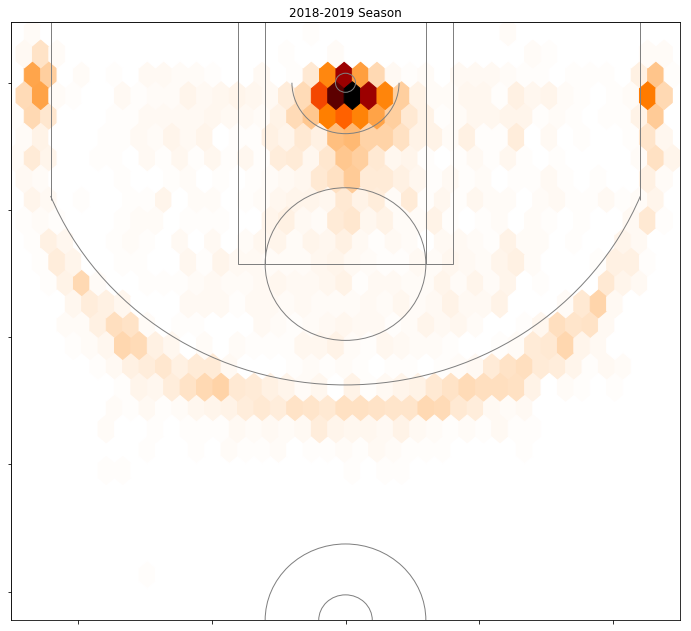

In [21]:
cmap = plt.cm.gist_heat_r
fig, ax = plt.subplots(1, 1, True, True, figsize=(12,11))
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)
ax.set_title('2018-2019 Season')
# draw_court(ax, color='grey', outer_lines='True')
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')
# im = plt.imread('Toronto Raptors Half Court 2018-2019.jpg')
# ax.imshow(im, extent=[-250, 250, 422.5, -47.5])

norm = MidpointNormalize(midpoint=0.2)
# plt.hexbin(x, y, make_miss_bin, reduce_C_function=np.average, gridsize=22, cmap=cmap, norm=norm)
plt.hexbin(x, y, gridsize=40, cmap=cmap)
draw_court(ax, color='grey', outer_lines='True')
plt.show()

In [89]:
np.average([0,1,1,0,0])

0.4

In [97]:
kawhi

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021800008,9,202695,Kawhi Leonard,1610612761,Toronto Raptors,1,11,24,...,Center(C),16-24 ft.,21,13,214,1,0,20181017,TOR,CLE
1,Shot Chart Detail,0021800008,15,200768,Kyle Lowry,1610612761,Toronto Raptors,1,11,2,...,Center(C),Less Than 8 ft.,1,-9,7,1,1,20181017,TOR,CLE
2,Shot Chart Detail,0021800008,22,201980,Danny Green,1610612761,Toronto Raptors,1,10,30,...,Left Side Center(LC),24+ ft.,26,-168,204,1,0,20181017,TOR,CLE
3,Shot Chart Detail,0021800008,28,202695,Kawhi Leonard,1610612761,Toronto Raptors,1,9,47,...,Right Side(R),8-16 ft.,12,118,44,1,0,20181017,TOR,CLE
4,Shot Chart Detail,0021800008,30,202685,Jonas Valanciunas,1610612761,Toronto Raptors,1,9,41,...,Center(C),Less Than 8 ft.,0,0,-6,1,0,20181017,TOR,CLE
5,Shot Chart Detail,0021800008,36,1627783,Pascal Siakam,1610612761,Toronto Raptors,1,9,10,...,Left Side(L),24+ ft.,22,-229,11,1,1,20181017,TOR,CLE
6,Shot Chart Detail,0021800008,45,202695,Kawhi Leonard,1610612761,Toronto Raptors,1,8,31,...,Center(C),8-16 ft.,12,-34,120,1,0,20181017,TOR,CLE
7,Shot Chart Detail,0021800008,53,202695,Kawhi Leonard,1610612761,Toronto Raptors,1,8,3,...,Center(C),Less Than 8 ft.,1,2,12,1,1,20181017,TOR,CLE
8,Shot Chart Detail,0021800008,56,1627783,Pascal Siakam,1610612761,Toronto Raptors,1,7,44,...,Center(C),Less Than 8 ft.,4,-19,41,1,1,20181017,TOR,CLE
9,Shot Chart Detail,0021800008,69,202685,Jonas Valanciunas,1610612761,Toronto Raptors,1,7,16,...,Center(C),8-16 ft.,9,24,90,1,1,20181017,TOR,CLE
